<a href="https://colab.research.google.com/github/Niranjan-Cholendiran/SPARK-GRIP/blob/main/TASK1/Student_Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
path="/content/drive/MyDrive/Internship/Spark GRIP/Task-1/Student_Scores.csv"
df=pd.read_csv(path)
df.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [9]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

Since the data has no null values, we can proceed with building the prediction model

## Data Visualizaton 

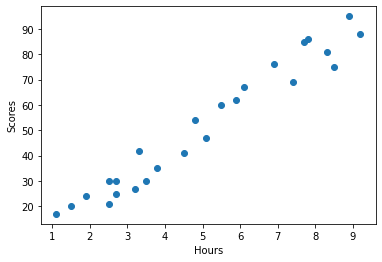

In [12]:
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Observation from the plot: Data is almost correlated linearly

# Splitting data for training and testing

In [21]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [73]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 
print("Training shape: ",X_train.shape)
print("Testing shape: ",X_test.shape)

Training shape:  (20, 1)
Testing shape:  (5, 1)


## Building prediction model

In [74]:
#Liner regression

from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the best fit line

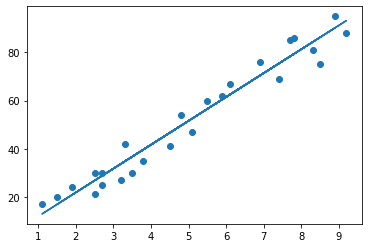

In [75]:
line = model.coef_*X+model.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Predicting

In [76]:
y_pred = model.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

Calculating the error value

In [77]:
from sklearn import metrics  

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# Prediction for own data

In [86]:
Hours = np.array([9.25]).reshape(1,1)
prediction= model.predict(Hours)
print("No of Hours= ",Hours[0][0])
print("Predicted Score= ",prediction[0])

No of Hours=  9.25
Predicted Score=  93.69173248737539
